# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

There have been concerns about pesticide use being linked to health related illnesses. One of the illnesses in particular is cancer. I will be looking at data that includes the use of pesticides by state, and a dataset that has the top 5 causes of death, which includes cancer, by state to see if cancer related deaths are high where the use of pesticides are high in the year of 2015. I am also going to research poverty percentages by state to see if there is correlation between pesticide use and poverty.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File (e.g., CSV File.)

Method: The Five Leading Causes of Death dataset was gathered using the "Programmatically downloading file" method from CDC.gov website.

Dataset variables that we are interested in:

* Year: Year of death
* Cause of Death: Illness related to death
* State: Location/State name
* State FIPS Code: Location/State code
* Age Range: Age range of the deceased
* Benchmark: Based on three states with the lowest age and specific cause of death mortaliy rates.
* Locality: Specifies if the area is Metropolitan, Non-Metropolitan, or both ("All").
* Observed Deaths: Number of deaths
* Population: Location population

I am not interested in including HHS Region, Expected Deaths, Potentially Excess Deaths, and Percent Potentially Excess Deaths, so I will be removing these variables.

Since this dataset includes the numbers of death and population by state, I will be able to calculate the the percent of deaths.

In [227]:
#import libraries
import pandas as pd
import requests
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
#1st data gathering and loading method
#Load Five Leading Causes of Death CSV file by programmatically downloading the file.

#Provide URL
url = 'https://data.cdc.gov/api/views/vdpk-qzpr/rows.csv?accessType=DOWNLOAD'

In [229]:
#Test connection
response = requests.get(url)
print(response)

<Response [200]>


In [230]:
response.raise_for_status()

In [231]:
#Read in CSV file
orig_death_df = pd.read_csv(url)

In [232]:
#Print cancer_df head
orig_death_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8


#### Dataset 2

Type: CSV File

Method: The Pesticide Use in Agriculture data was gather using the "Download data manually" method from the Kaggle.com website, along with the Data Dictionary to get the name for the state code.

Dataset variables:

* COMPOUND: Type of pesticide
* YEAR: Year pesicide used
* STATE_CODE: Code for location/state name
* LOW_ESTIMATE: Assumed zero use if usage was not reported
* HIGH_ESTIMATE: Unreported usage that is treated as missing data and has estimated pesticide usage based on use of pesticides in neighboring locations within the same region.

I am not interested in keeping County Code, so I will be dropping that variable.

This dataset will allow me to gather the mean of pesicide use by state.

In [233]:
#2nd data gathering and loading method
#Load Pesticide Use CSV file manually
orig_pesticide_df = pd.read_csv('Pesticide_Use.csv')


In [234]:
#preview data
orig_pesticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0


#### Dataset 3

Type: CSV File

Method: The Pesticide Use Dictionary data was gathered using the "Download data manually" method from the Kaggle.com website.

Dataset variables:

* STATE_CODE: Location/State code
* STATE: Location/State name

The dataframe also includes County Code and County, but I will not need to use those two variables, so I will dropping them.

In [235]:
#3rd data gathering and loading method
#Load Pesticide Use Dictionary CSV file manually
p_dictionary = pd.read_csv('Pesticide_Use_Dictionary.csv')

In [236]:
#preview data
p_dictionary.head()

,STATE_CODE,COUNTY_CODE,COUNTY,STATE
0,1,1,Autauga County,AL
1,1,3,Baldwin County,AL
2,1,5,Barbour County,AL
3,1,7,Bibb County,AL
4,1,9,Blount County,AL


### Dataset 4

Type: Excel file

Method: The Poverty data was gathered using the "Download data manually" method from the Census.gov website.

Dataset variables:

* Postal Code
* Poverty Percent, All Ages

The dataframe also includes State FIPD Code, Name, Poverty Percent (by age ranges), All Ages, 90% CI Lower Bound, CI 90% Upper Bound, Median Household Income. I will be dropping these variables from the dataframe.

This dataset will allow me to add the poverty percentage for each State.

In [237]:
#4th data gathering and Loading method
#Load poverty data Excel file manually
orig_poverty_df = pd.read_excel('poverty_data.xls')

In [238]:
#preview data
orig_poverty_df.head()

,Table with column headers in rows 3 and 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,2015 Poverty and Median Household Income Estim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Information,NaN,NaN,All Ages,NaN,NaN,NaN,NaN,NaN,Age 0-17,...,NaN,Median Household Income,NaN,NaN,Age 0-4,NaN,NaN,NaN,NaN,NaN
2,State FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-17",...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,US,United States,46153077,45878016,46428138,14.7,14.6,14.8,15000273,...,19.7,55775,55690,55860,4448211,4397105,4499317,22.8,22.5,23.1
4,01,AL,Alabama,875853,859781,891925,18.5,18.2,18.8,288450,...,26.1,44833,44110,45556,84382,80530,88234,29.4,28.1,30.7


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [239]:
#Optional: store the raw data in your local data store
orig_death_df.to_csv('orig_death_df.csv', index=False)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [240]:
#FILL IN - Inspecting the dataframe visually
orig_death_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8


In [241]:
#FILL IN - Inspecting the dataframe programmatically
orig_death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205920 entries, 0 to 205919
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Year                               205920 non-null  int64  
 1   Cause of Death                     205920 non-null  object 
 2   State                              205920 non-null  object 
 3   State FIPS Code                    205920 non-null  object 
 4   HHS Region                         205920 non-null  int64  
 5   Age Range                          205920 non-null  object 
 6   Benchmark                          205920 non-null  object 
 7   Locality                           205920 non-null  object 
 8   Observed Deaths                    195708 non-null  float64
 9   Population                         200640 non-null  float64
 10  Expected Deaths                    195708 non-null  float64
 11  Potentially Excess Deaths          1957

Issue and justification: There are null values in the Observed Deaths and Population columns. These null values will not be helpful when calculating the percent of deaths, so I am choosing to remove them.

### Quality Issue 2:

In [242]:
#Inspecting the dataframe visually
orig_pesticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0


In [243]:
#Inspecting the dataframe programmatically
orig_pesticide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369763 entries, 0 to 369762
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   COMPOUND       369763 non-null  object 
 1   YEAR           369763 non-null  int64  
 2   STATE_CODE     369763 non-null  int64  
 3   COUNTY_CODE    369763 non-null  int64  
 4   LOW_ESTIMATE   247583 non-null  float64
 5   HIGH_ESTIMATE  369763 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 16.9+ MB


Issue and justification: There are a great number of null values in the LOW_ESTIMATE column of the pesticide dataframe. I will drop that column and use the HIGH_ESTIMATE column to get the pesticide usage result.

### Quality Issue 3:

In [244]:
#Inspecting the dataframe visually
orig_death_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8


In [245]:
#FILL IN - Inspecting the dataframe programmatically
orig_death_df.State.nunique()

52

In [246]:
#FILL IN - Inspecting the dataframe programmatically
orig_death_df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Delaware',
       'California', 'Colorado', 'Connecticut', 'New Jersey',
       'District of\nColumbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Rhode Island', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [247]:
#FILL IN - Inspecting the dataframe visually
orig_pesticide_df.head(15)

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0
5,1-Methyl Cyclopropene,2015,41,59,NaN,5.7
6,1-Methyl Cyclopropene,2015,41,61,NaN,0.0
7,1-Methyl Cyclopropene,2015,41,63,NaN,0.0
8,1-Methyl Cyclopropene,2015,41,65,NaN,0.1
9,1-Methyl Cyclopropene,2015,53,1,NaN,10.6


In [248]:
#Inspecting the dataframe programmatically
orig_pesticide_df.STATE_CODE.nunique()

47

Issue and justification: I will eventually merge the dataframes based on the State columns. I need to determine if all or the same states are in each dataframe. In the death dataframe there are 52 unique values in the state column. In the pesticide dataframe there or only 47 unique values in the STATE_CODE column. It appears that we have 5 more states in the death dataframe than we do in the pesticide dataframe. Because we will not have pesticide data for some of the states, we will need to remove those states in the clean dataframe.

### Tidiness Issue 1: 

In [249]:
#Inspecting the dataframe visually
orig_death_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8


In [250]:
#Inspecting the dataframe programmatically
orig_death_df['Age Range'].unique()

array(['0-49', '0-54', '0-59', '0-64', '0-69', '0-74', '0-79', '0-84'],
      dtype=object)

Issue and justification: In the death dataframe, the Age Range column has all age ranges that start with zero. For example, a person that is the age of 60 would be included in the 0-49, 0-54, and 0-64 age ranges. This will lead to calculations. I am interested in including all ages in my research, so will be using the rows where the age range is 0-84. I will be removing the rows for all other age ranges. 

### Tidiness Issue 2: 

In [251]:
#Inspecting the dataframe visually
orig_poverty_df.head() 

,Table with column headers in rows 3 and 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,2015 Poverty and Median Household Income Estim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Information,NaN,NaN,All Ages,NaN,NaN,NaN,NaN,NaN,Age 0-17,...,NaN,Median Household Income,NaN,NaN,Age 0-4,NaN,NaN,NaN,NaN,NaN
2,State FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-17",...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,US,United States,46153077,45878016,46428138,14.7,14.6,14.8,15000273,...,19.7,55775,55690,55860,4448211,4397105,4499317,22.8,22.5,23.1
4,01,AL,Alabama,875853,859781,891925,18.5,18.2,18.8,288450,...,26.1,44833,44110,45556,84382,80530,88234,29.4,28.1,30.7


In [252]:
#Inspecting the dataframe programmatically
orig_poverty_df.columns

Index(['Table with column headers in rows 3 and 4', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29'],
      dtype='object')

Issue and justification: The poverty dataframe has the incorrect columns names. Instead, the top of the file has information about the dataset. I will need to reset the header row so that the correct names are displayed.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [253]:
#Make copies of the datasets to ensure the raw dataframes 
# are not impacted
clean_cancer_df = orig_death_df.copy()
clean_pesticide_df = orig_pesticide_df.copy()
clean_p_dictionary_df = p_dictionary.copy()
clean_poverty_df = orig_poverty_df.copy()

### Quality Issue 1: 
The Observed Death and Population columns have null values. These null values with not be helpful when calculating the percentage of deaths, so they should be removed.

In [254]:
# Apply the cleaning strategy
clean_cancer_df = clean_cancer_df.dropna(subset=['Observed Deaths'])


In [255]:
# Validate the cleaning was successful
clean_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195708 entries, 0 to 205919
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Year                               195708 non-null  int64  
 1   Cause of Death                     195708 non-null  object 
 2   State                              195708 non-null  object 
 3   State FIPS Code                    195708 non-null  object 
 4   HHS Region                         195708 non-null  int64  
 5   Age Range                          195708 non-null  object 
 6   Benchmark                          195708 non-null  object 
 7   Locality                           195708 non-null  object 
 8   Observed Deaths                    195708 non-null  float64
 9   Population                         195708 non-null  float64
 10  Expected Deaths                    195708 non-null  float64
 11  Potentially Excess Deaths          195708 no

Justification: After dropping the the rows where the Observed Death value is null, all nulls have been removed for Observed Death and Population. This dataset no longer has null values.

### Quality Issue 2: 
The Low Estimate columns has many missisg values, so I am choosing to drop this column and use the High Estimate column.

In [256]:
#Apply the cleaning strategy
clean_pesticide_df = clean_pesticide_df.drop('LOW_ESTIMATE', axis=1)

In [257]:
#FILL IN - Validate the cleaning was successful
clean_pesticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,0.0
1,1-Methyl Cyclopropene,2015,41,21,0.1
2,1-Methyl Cyclopropene,2015,41,27,1.7
3,1-Methyl Cyclopropene,2015,41,49,0.1
4,1-Methyl Cyclopropene,2015,41,55,0.0


Justification: This dataset no longer includes the Low Estimate column. I can now move forward with calculating the mean for the High Estimate column.

### Tidiness Issue 1:
In the death dataframe, the Age Range column has all age ranges that start with zero. For example, a person that is the age of 60 would be included in the 0-49, 0-54, and 0-64 age ranges. This will lead to calculations. 

In [258]:
#Apply the cleaning strategy
clean_cancer_df = clean_cancer_df[clean_cancer_df['Age Range'] == '0-84']

In [259]:
#Validate the cleaning was successful
clean_cancer_df['Age Range'].unique()

array(['0-84'], dtype=object)

Justification: The death dataframe now only has rows where all age ranges are included, insteaded have some ages added multiple times.

### Tidiness Issue 2:
In the poverty dataframe, the column headers are displaying incorrectly.

In [260]:
#Apply the cleaning strategy
clean_poverty_df.columns = orig_poverty_df.iloc[2]
clean_poverty_df = clean_poverty_df.drop(clean_poverty_df.index[[0,1,2]])
clean_poverty_df = clean_poverty_df.reset_index(drop=True)

In [262]:
#Validate the cleaning was successful
clean_poverty_df.head()

2,State FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-17",...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,US,United States,46153077,45878016,46428138,14.7,14.6,14.8,15000273,...,19.7,55775,55690,55860,4448211,4397105,4499317,22.8,22.5,23.1
1,01,AL,Alabama,875853,859781,891925,18.5,18.2,18.8,288450,...,26.1,44833,44110,45556,84382,80530,88234,29.4,28.1,30.7
2,02,AK,Alaska,74941,71399,78483,10.4,9.9,10.9,26564,...,14.5,73391,71522,75260,8535,7584,9486,15.8,14,17.6
3,04,AZ,Arizona,1159046,1136666,1181426,17.4,17.1,17.7,394337,...,24.4,51473,51046,51900,113218,108523,117913,27,25.9,28.1
4,05,AR,Arkansas,540733,528756,552710,18.7,18.3,19.1,182238,...,25.6,42046,41574,42518,56199,53157,59241,30.5,28.9,32.1


Justification: The columns headers are now correct, but there are duplicates header names. I am only interested in the Postal Code and Poverty Percent for All Ages, so I will remove the other columns.

In [263]:
#remove columns from clean_poverty_df
clean_poverty_df = clean_poverty_df.drop(['State FIPS Code','Name','Poverty Estimate, All Ages','90% CI Upper Bound','90% CI Lower Bound',
                             'Poverty Estimate, Age 0-17','Poverty Percent, Age 0-4'], axis=1)

In [264]:
clean_poverty_df.head()

2,Postal Code,"Poverty Percent, All Ages","Poverty Percent, Age 0-17","Poverty Estimate, Age 5-17 in Families","Poverty Percent, Age 5-17 in Families",Median Household Income,"Poverty Estimate, Age 0-4"
0,US,14.7,20.7,10245028,19.5,55775,4448211
1,AL,18.5,26.5,201222,25.2,44833,84382
2,AK,10.4,14.5,16959,13.3,73391,8535
3,AZ,17.4,24.7,274270,23.5,51473,113218
4,AR,18.7,26.4,122440,24.5,42046,56199


In [265]:
#remove remainder of clean_poverty_df columns that are not needed
clean_poverty_df = clean_poverty_df.drop(['Poverty Percent, Age 0-17','Poverty Estimate, Age 5-17 in Families','Poverty Percent, Age 5-17 in Families','Median Household Income','Poverty Estimate, Age 0-4'],axis=1)

In [266]:
clean_poverty_df.head()

2,Postal Code,"Poverty Percent, All Ages"
0,US,14.7
1,AL,18.5
2,AK,10.4
3,AZ,17.4
4,AR,18.7


I will not be using pesticide use by county in this research project, so will need ot drop the County Code, and County columns.

In [267]:
#Apply the cleaning strategy
clean_p_dictionary_df = clean_p_dictionary_df.drop(['COUNTY_CODE','COUNTY'], axis=1) 

In [268]:
clean_p_dictionary_df.head()

,STATE_CODE,STATE
0,1,AL
1,1,AL
2,1,AL
3,1,AL
4,1,AL


There are dulplicate rows in the clean_p_dictionary_df. I will remove the duplicates.

In [269]:
clean_p_dictionary_df = clean_p_dictionary_df.drop_duplicates()

In [270]:
clean_p_dictionary_df.head()

,STATE_CODE,STATE
0,1,AL
67,2,AK
96,4,AZ
111,5,AR
186,6,CA


Now that the duplicates have been removed, I can merge the clean_pesticide_df and the clean_p_dictionary_df.

In [271]:
clean_pesticide_df = clean_pesticide_df.merge(clean_p_dictionary_df, on="STATE_CODE", how='left')

In [272]:
#Validate the cleaning was successful
clean_pesticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,HIGH_ESTIMATE,STATE
0,1-Methyl Cyclopropene,2015,41,1,0.0,OR
1,1-Methyl Cyclopropene,2015,41,21,0.1,OR
2,1-Methyl Cyclopropene,2015,41,27,1.7,OR
3,1-Methyl Cyclopropene,2015,41,49,0.1,OR
4,1-Methyl Cyclopropene,2015,41,55,0.0,OR


Justification: We can now see the State abbreviation in the clean_pesticide_df dataframe.

The Death dataframe includes the top 5 causes of death. I only need the rows where the cause of death is cancer.

In [273]:
#Apply the cleaning strategy
clean_cancer_df = clean_cancer_df[clean_cancer_df['Cause of Death'] == 'Cancer']

In [274]:
#Validate the cleaning was successful
clean_cancer_df['Cause of Death'].unique()

array(['Cancer'], dtype=object)

Justification: We can see here that the only unique value in the Cause of Death column is now "Cancer". All other causes have been removed.

The Locality column included three types of locations: metropolitan, non-metropolitan, and all. I want to research both metropolitan and non-metropolitan areas, so I am choosing to use the rows where Locality is "All".

In [275]:
#Apply the cleaning strategy
clean_cancer_df = clean_cancer_df[clean_cancer_df['Locality'] == 'All']

In [276]:
#Validate the cleaning was successful
clean_cancer_df['Locality'].unique()

array(['All'], dtype=object)

Justification: We can see that the only unique value in the Locality column is All.

The pesticide dataframe has pesticide usage broken out by compound, year, state, and county code. I will like to include the mean for pesticide use by state. To do so, I will group the dataframe by the State column to get the mean of the High Estimate column.

In [277]:
#Apply the cleaning strategy
pesticide_mean_df = clean_pesticide_df.groupby('STATE')['HIGH_ESTIMATE'].mean().to_frame('PESTICIDE_USE_MEAN')

In [278]:
pesticide_mean_df.head()

,PESTICIDE_USE_MEAN
STATE,
AL,557.698539
AR,1862.021612
AZ,907.561324
CO,1481.976945
CT,111.018659


In [279]:
#reset index
pesticide_mean_df = pesticide_mean_df.reset_index(drop=False)

In [280]:
#Validate the cleaning was successful
pesticide_mean_df.head()

,STATE,PESTICIDE_USE_MEAN
0,AL,557.698539
1,AR,1862.021612
2,AZ,907.561324
3,CO,1481.976945
4,CT,111.018659


In [281]:
#Merge pesticide_mean with clean_pesticide_df
clean_pesticide_df = pd.merge(clean_pesticide_df, pesticide_mean_df, on=['STATE'], how='left')

In [282]:
#view head of clean_pesticide_df to confirm Pesticide_Use_Mean is added
clean_pesticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,HIGH_ESTIMATE,STATE,PESTICIDE_USE_MEAN
0,1-Methyl Cyclopropene,2015,41,1,0.0,OR,1164.397684
1,1-Methyl Cyclopropene,2015,41,21,0.1,OR,1164.397684
2,1-Methyl Cyclopropene,2015,41,27,1.7,OR,1164.397684
3,1-Methyl Cyclopropene,2015,41,49,0.1,OR,1164.397684
4,1-Methyl Cyclopropene,2015,41,55,0.0,OR,1164.397684


The Pesticde Use Mean column has been added, but it is duplicated for each state since the dataframe is still broken out by county code. I am going to rename this column to "State Pesticide Use Mean" so that there is no confusion on what this result represents.

In [283]:
#Rename "PESTICIDE_USE_MEAN" as "STATE_PESTICIDE_USE_MEAN"
clean_pesticide_df = clean_pesticide_df.rename(columns={'PESTICIDE_USE_MEAN':'STATE_PESTICIDE_USE_MEAN'})

In [284]:
clean_pesticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,HIGH_ESTIMATE,STATE,STATE_PESTICIDE_USE_MEAN
0,1-Methyl Cyclopropene,2015,41,1,0.0,OR,1164.397684
1,1-Methyl Cyclopropene,2015,41,21,0.1,OR,1164.397684
2,1-Methyl Cyclopropene,2015,41,27,1.7,OR,1164.397684
3,1-Methyl Cyclopropene,2015,41,49,0.1,OR,1164.397684
4,1-Methyl Cyclopropene,2015,41,55,0.0,OR,1164.397684


Justification: Now that I have the High Estimate mean for pesticide use by state, I can add the mean to the clean pesticide dataframe.

The clean_cancer_df dataframe has 2005 Fixed, 2010 Fixed, and Floating as options in the Benchmark column. I would like to use the rows where the benchmark is floating. This will allow me to remove duplicate rows.

In [285]:
#Apply the cleaning strategy
clean_cancer_df = clean_cancer_df[clean_cancer_df['Benchmark'] == 'Floating']

In [286]:
#Validate the cleaning was successful
clean_cancer_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
69,2005,Cancer,Alabama,AL,4,0-84,Floating,All,8628.0,4502415.0,6182.0,2446.0,28.3
141,2005,Cancer,Alaska,AK,10,0-84,Floating,All,659.0,663333.0,596.0,67.0,10.2
213,2005,Cancer,Arizona,AZ,9,0-84,Floating,All,8410.0,5756893.0,7670.0,740.0,8.8
286,2005,Cancer,Arkansas,AR,6,0-84,Floating,All,5520.0,2733969.0,3848.0,1672.0,30.3
358,2005,Cancer,California,CA,9,0-84,Floating,All,46195.0,35334704.0,40784.0,5411.0,11.7


Justification: The duplicate rows for Benchmark are now removed.

The clean_cancer_df dataframe does not include a column for percent of deaths. I would like to calucate this information and include it in the dataframe.

In [287]:
#Apply the cleaning strategy
clean_cancer_df['PercentDeaths'] = clean_cancer_df['Observed Deaths'] / clean_cancer_df['Population'] * 100

In [288]:
#Validate the cleaning was successful
clean_cancer_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,PercentDeaths
69,2005,Cancer,Alabama,AL,4,0-84,Floating,All,8628.0,4502415.0,6182.0,2446.0,28.3,0.191630
141,2005,Cancer,Alaska,AK,10,0-84,Floating,All,659.0,663333.0,596.0,67.0,10.2,0.099347
213,2005,Cancer,Arizona,AZ,9,0-84,Floating,All,8410.0,5756893.0,7670.0,740.0,8.8,0.146086
286,2005,Cancer,Arkansas,AR,6,0-84,Floating,All,5520.0,2733969.0,3848.0,1672.0,30.3,0.201904
358,2005,Cancer,California,CA,9,0-84,Floating,All,46195.0,35334704.0,40784.0,5411.0,11.7,0.130735


Justification: I used the Observed Deaths as the numerator and the Population columns to calculate the PercentDeath columns.

The column names with more that one word have spaces in the clean_cancer_df dataframe and the clean_poverty_df dataframe. I would like to remove those spaces by renaming the columns.

In [289]:
#Apply the cleaning strategy
#Remove spaces from column names in the clean_cancer_df
clean_cancer_df = clean_cancer_df.rename(columns={'Year':'YEAR','Cause of Death':'CAUSE_OF_DEATH','State':'STATE','State FIPS Code':'STATE_FIPS_CODE',
                                                 'Age Range':'AGE_RANGE','Benchmark':'BENCHMARK','Locality':'LOCALITY','Observed Deaths':'OBSERVED_DEATHS',
                                                 'Population':'POPULATION','PercentDeaths':'PERCENT_OF_DEATHS'})

In [290]:
#Validate the cleaning was successful
clean_cancer_df.head()

,YEAR,CAUSE_OF_DEATH,STATE,STATE_FIPS_CODE,HHS Region,AGE_RANGE,BENCHMARK,LOCALITY,OBSERVED_DEATHS,POPULATION,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,PERCENT_OF_DEATHS
69,2005,Cancer,Alabama,AL,4,0-84,Floating,All,8628.0,4502415.0,6182.0,2446.0,28.3,0.191630
141,2005,Cancer,Alaska,AK,10,0-84,Floating,All,659.0,663333.0,596.0,67.0,10.2,0.099347
213,2005,Cancer,Arizona,AZ,9,0-84,Floating,All,8410.0,5756893.0,7670.0,740.0,8.8,0.146086
286,2005,Cancer,Arkansas,AR,6,0-84,Floating,All,5520.0,2733969.0,3848.0,1672.0,30.3,0.201904
358,2005,Cancer,California,CA,9,0-84,Floating,All,46195.0,35334704.0,40784.0,5411.0,11.7,0.130735


In [291]:
#Apply the cleaning strategy
#Remove spaces from column names in the clean_poverty_df
clean_poverty_df = clean_poverty_df.rename(columns={'Poverty Percent, All Ages':'POVERTY_PERCENT_ALL_AGES','Postal Code':'POSTAL_CODE'})

Justification: The columns that I will be continuing use in the research now have no spaces in the name.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [292]:
#Remove unnecessary variables and combine datasets

I would like to view the dataframes before I combine the datasets and remove variables.

In [293]:
#view clean_cancer_df
clean_cancer_df.head()

,YEAR,CAUSE_OF_DEATH,STATE,STATE_FIPS_CODE,HHS Region,AGE_RANGE,BENCHMARK,LOCALITY,OBSERVED_DEATHS,POPULATION,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,PERCENT_OF_DEATHS
69,2005,Cancer,Alabama,AL,4,0-84,Floating,All,8628.0,4502415.0,6182.0,2446.0,28.3,0.191630
141,2005,Cancer,Alaska,AK,10,0-84,Floating,All,659.0,663333.0,596.0,67.0,10.2,0.099347
213,2005,Cancer,Arizona,AZ,9,0-84,Floating,All,8410.0,5756893.0,7670.0,740.0,8.8,0.146086
286,2005,Cancer,Arkansas,AR,6,0-84,Floating,All,5520.0,2733969.0,3848.0,1672.0,30.3,0.201904
358,2005,Cancer,California,CA,9,0-84,Floating,All,46195.0,35334704.0,40784.0,5411.0,11.7,0.130735


In [294]:
#view clean_pesticide_df
clean_pesticide_df.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,HIGH_ESTIMATE,STATE,STATE_PESTICIDE_USE_MEAN
0,1-Methyl Cyclopropene,2015,41,1,0.0,OR,1164.397684
1,1-Methyl Cyclopropene,2015,41,21,0.1,OR,1164.397684
2,1-Methyl Cyclopropene,2015,41,27,1.7,OR,1164.397684
3,1-Methyl Cyclopropene,2015,41,49,0.1,OR,1164.397684
4,1-Methyl Cyclopropene,2015,41,55,0.0,OR,1164.397684


In [295]:
#view clean_poverty_df
clean_poverty_df.head()

2,POSTAL_CODE,POVERTY_PERCENT_ALL_AGES
0,US,14.7
1,AL,18.5
2,AK,10.4
3,AZ,17.4
4,AR,18.7


I need a common column to merge the three dataframes on. I am going to use the State column in the pesticde dataframe and the State FIPS Code column in the cancer dataframe and State column in the poverty dataframe. To merge the dataframes using these three columns, first I will need to rename the State column in th pesticide dataframe to "STATE_FIPS_CODE", and Postal Code column in the poverty dataframe to "STATE_FIPS_CODE.

In [296]:
#rename State column to "STATE_FIPS_CODE"
clean_pesticide_df = clean_pesticide_df.rename(columns={'STATE':'STATE_FIPS_CODE'})

In [297]:
#verify column name change
clean_pesticide_df.columns

Index(['COMPOUND', 'YEAR', 'STATE_CODE', 'COUNTY_CODE', 'HIGH_ESTIMATE',
       'STATE_FIPS_CODE', 'STATE_PESTICIDE_USE_MEAN'],
      dtype='object')

In [298]:
#rename Postal Code column to "STATE_FIPS_CODE"
clean_poverty_df = clean_poverty_df.rename(columns={'POSTAL_CODE':'STATE_FIPS_CODE'})

In [301]:
#verify column name change
clean_poverty_df.head()

2,STATE_FIPS_CODE,POVERTY_PERCENT_ALL_AGES
0,US,14.7
1,AL,18.5
2,AK,10.4
3,AZ,17.4
4,AR,18.7


In [302]:
#merge dataframes
merged_df = pd.merge(clean_cancer_df,clean_pesticide_df, on=['YEAR','STATE_FIPS_CODE'], how='left')

In [303]:
#confirm the merge
merged_df.head()

,YEAR,CAUSE_OF_DEATH,STATE,STATE_FIPS_CODE,HHS Region,AGE_RANGE,BENCHMARK,LOCALITY,OBSERVED_DEATHS,POPULATION,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,PERCENT_OF_DEATHS,COMPOUND,STATE_CODE,COUNTY_CODE,HIGH_ESTIMATE,STATE_PESTICIDE_USE_MEAN
0,2005,Cancer,Alabama,AL,4,0-84,Floating,All,8628.0,4502415.0,6182.0,2446.0,28.3,0.191630,NaN,NaN,NaN,NaN,NaN
1,2005,Cancer,Alaska,AK,10,0-84,Floating,All,659.0,663333.0,596.0,67.0,10.2,0.099347,NaN,NaN,NaN,NaN,NaN
2,2005,Cancer,Arizona,AZ,9,0-84,Floating,All,8410.0,5756893.0,7670.0,740.0,8.8,0.146086,NaN,NaN,NaN,NaN,NaN
3,2005,Cancer,Arkansas,AR,6,0-84,Floating,All,5520.0,2733969.0,3848.0,1672.0,30.3,0.201904,NaN,NaN,NaN,NaN,NaN
4,2005,Cancer,California,CA,9,0-84,Floating,All,46195.0,35334704.0,40784.0,5411.0,11.7,0.130735,NaN,NaN,NaN,NaN,NaN


In [304]:
#merge dataframes
merged_df = pd.merge(merged_df,clean_poverty_df, on=['STATE_FIPS_CODE'], how='left')

In [305]:
merged_df.head()

,YEAR,CAUSE_OF_DEATH,STATE,STATE_FIPS_CODE,HHS Region,AGE_RANGE,BENCHMARK,LOCALITY,OBSERVED_DEATHS,POPULATION,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,PERCENT_OF_DEATHS,COMPOUND,STATE_CODE,COUNTY_CODE,HIGH_ESTIMATE,STATE_PESTICIDE_USE_MEAN,POVERTY_PERCENT_ALL_AGES
0,2005,Cancer,Alabama,AL,4,0-84,Floating,All,8628.0,4502415.0,6182.0,2446.0,28.3,0.191630,NaN,NaN,NaN,NaN,NaN,18.5
1,2005,Cancer,Alaska,AK,10,0-84,Floating,All,659.0,663333.0,596.0,67.0,10.2,0.099347,NaN,NaN,NaN,NaN,NaN,10.4
2,2005,Cancer,Arizona,AZ,9,0-84,Floating,All,8410.0,5756893.0,7670.0,740.0,8.8,0.146086,NaN,NaN,NaN,NaN,NaN,17.4
3,2005,Cancer,Arkansas,AR,6,0-84,Floating,All,5520.0,2733969.0,3848.0,1672.0,30.3,0.201904,NaN,NaN,NaN,NaN,NaN,18.7
4,2005,Cancer,California,CA,9,0-84,Floating,All,46195.0,35334704.0,40784.0,5411.0,11.7,0.130735,NaN,NaN,NaN,NaN,NaN,15.4


Now that the dataframes have been merged, I can drop the columns that are no longer needed.

In [306]:
#remove variables
merged_df = merged_df.drop(['HHS Region','Expected Deaths','Potentially Excess Deaths','Percent Potentially Excess Deaths','COMPOUND','STATE_CODE','COUNTY_CODE',
                          'HIGH_ESTIMATE'], axis=1)


After the merge, there is strong possibility that I have duplicate rows. I go ahead and take care of that in the next step to ensure that we do not have duplicate rows.

In [307]:
#drop duplicate rows
merged_df = merged_df.drop_duplicates()

In [308]:
#view dataframe
merged_df.head()

,YEAR,CAUSE_OF_DEATH,STATE,STATE_FIPS_CODE,AGE_RANGE,BENCHMARK,LOCALITY,OBSERVED_DEATHS,POPULATION,PERCENT_OF_DEATHS,STATE_PESTICIDE_USE_MEAN,POVERTY_PERCENT_ALL_AGES
0,2005,Cancer,Alabama,AL,0-84,Floating,All,8628.0,4502415.0,0.191630,NaN,18.5
1,2005,Cancer,Alaska,AK,0-84,Floating,All,659.0,663333.0,0.099347,NaN,10.4
2,2005,Cancer,Arizona,AZ,0-84,Floating,All,8410.0,5756893.0,0.146086,NaN,17.4
3,2005,Cancer,Arkansas,AR,0-84,Floating,All,5520.0,2733969.0,0.201904,NaN,18.7
4,2005,Cancer,California,CA,0-84,Floating,All,46195.0,35334704.0,0.130735,NaN,15.4


In [309]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 0 to 368483
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   YEAR                      572 non-null    int64  
 1   CAUSE_OF_DEATH            572 non-null    object 
 2   STATE                     572 non-null    object 
 3   STATE_FIPS_CODE           572 non-null    object 
 4   AGE_RANGE                 572 non-null    object 
 5   BENCHMARK                 572 non-null    object 
 6   LOCALITY                  572 non-null    object 
 7   OBSERVED_DEATHS           572 non-null    float64
 8   POPULATION                572 non-null    float64
 9   PERCENT_OF_DEATHS         572 non-null    float64
 10  STATE_PESTICIDE_USE_MEAN  47 non-null     float64
 11  POVERTY_PERCENT_ALL_AGES  561 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 58.1+ KB


### Quality Issue 3:
There are more States in the Cancer dataframe than there are in the Pesticide dataframe, so I will not have Pesticide Use for every State. Now that I have merged the two dataframes, I can remove the States where the State Pesticide Use Mean value is null.

In [310]:
#drop rows when Percent of Deaths is null
merged_df = merged_df.dropna(subset=['STATE_PESTICIDE_USE_MEAN'])

Justification: We saw that there were more States in the Cancer dataframe than there were in the Pesticide dataframe. I was unaware of which States were missing from the Pesticide dataframe. I was able to remove the States where the STATE_PESTICIDE_USE_MEAN was null since those States were added after merging the two dataframes.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [311]:
# saving data
merged_df.to_csv('Pesticide_Use_and_Cancer.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question: Is there a correlation between pesticide use and cancer? Are the death percentages higher in states that have a greater mean for pesticide use in the year of 2015? Is there a correlation between poverty and pesticide use in the year of 2015?

In [312]:
data2015 = merged_df[merged_df['YEAR'] == 2015]

<function matplotlib.pyplot.show(close=None, block=None)>

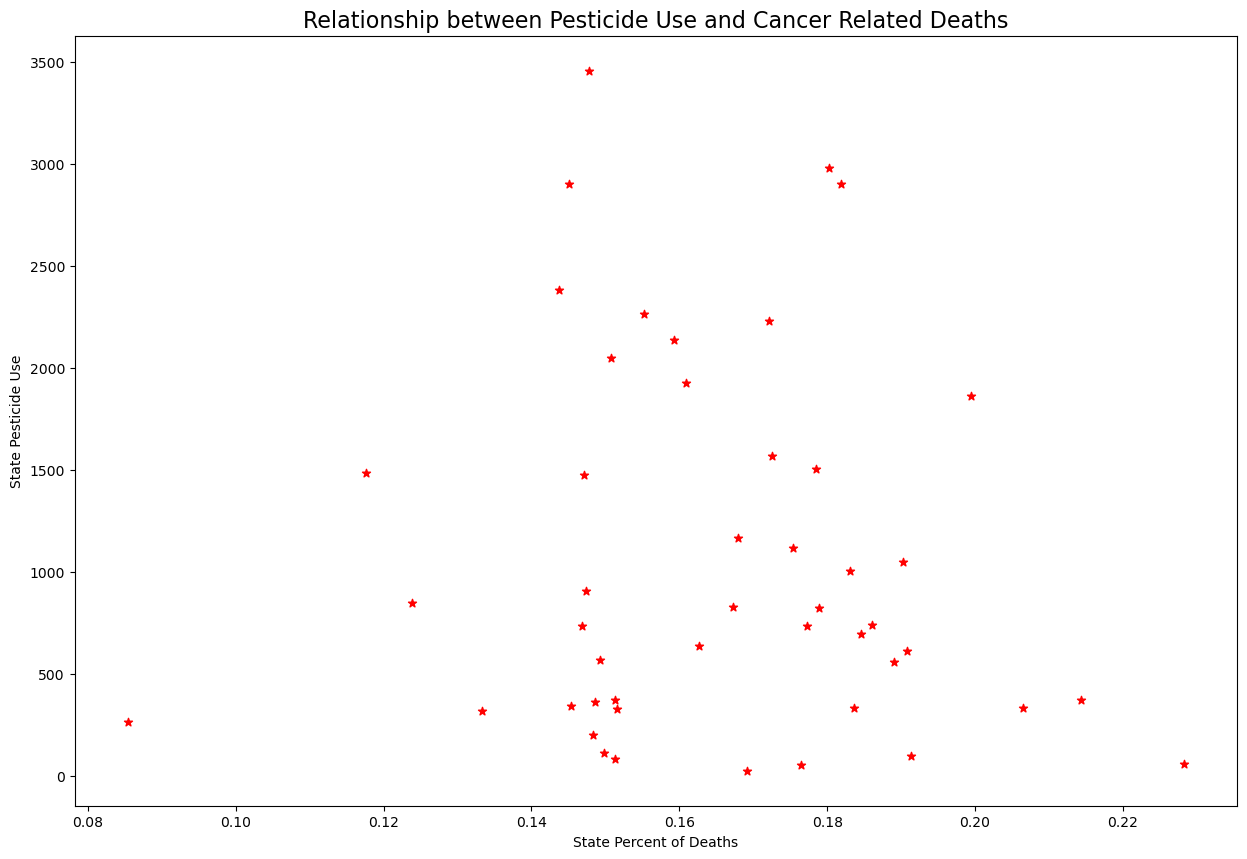

In [313]:
#Visual 1 

plt.figure(figsize=(15,10))
plt.scatter(data2015['PERCENT_OF_DEATHS'], data2015['STATE_PESTICIDE_USE_MEAN'], c="red", marker='*')
plt.title("Relationship between Pesticide Use and Cancer Related Deaths", fontsize=16)
plt.xlabel("State Percent of Deaths")
plt.ylabel("State Pesticide Use")
plt.show


*Answer to research question:* I did not find a strong correlation between pesticide use and cancer related deaths in this scatter plot. At one point it seems as if pesticide use rises the percent of death increases, but then the percent of deaths increase and then the pesticide use comes down.

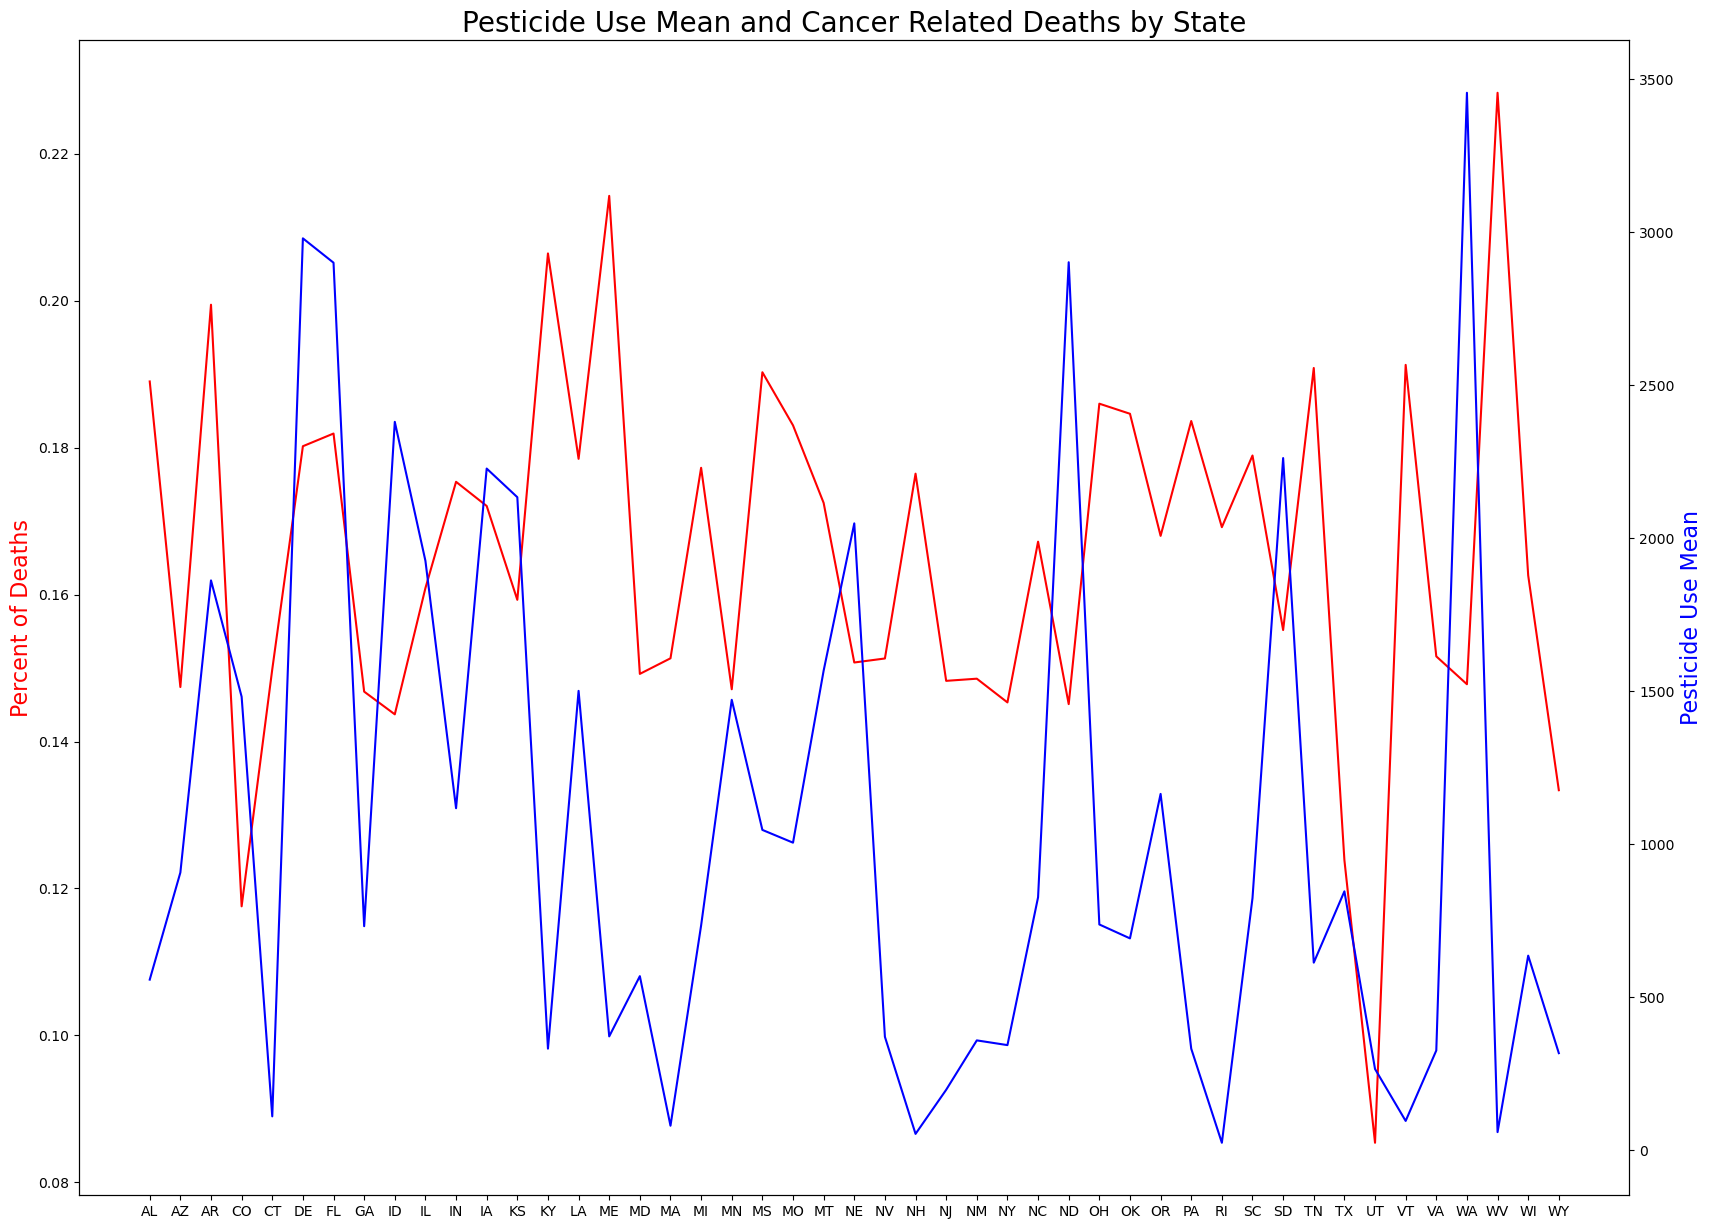

In [314]:
#Visual 2
x=data2015.STATE_FIPS_CODE
y1=data2015['PERCENT_OF_DEATHS']
y2=data2015['STATE_PESTICIDE_USE_MEAN']
fig, ax1=plt.subplots(figsize=(20,15))
ax2=ax1.twinx()
plot1=ax1.plot(x,y1, color='r')
plot2=ax2.plot(x,y2, color='b')
ax1.set_ylabel('Percent of Deaths',fontsize=16, color='r')
ax2.set_ylabel('Pesticide Use Mean',fontsize=16, color='b')
plt.title("Pesticide Use Mean and Cancer Related Deaths by State", fontsize=20)
plt.plot()
plt.show()

*Answer to research question:* I did not find a strong correlation between pesticide use and cancer related deaths in this visual. In some cases the pesticide use goes up with cancer related deaths, but in other cases the percent of deaths is up while the use of pesticides is down.

<function matplotlib.pyplot.show(close=None, block=None)>

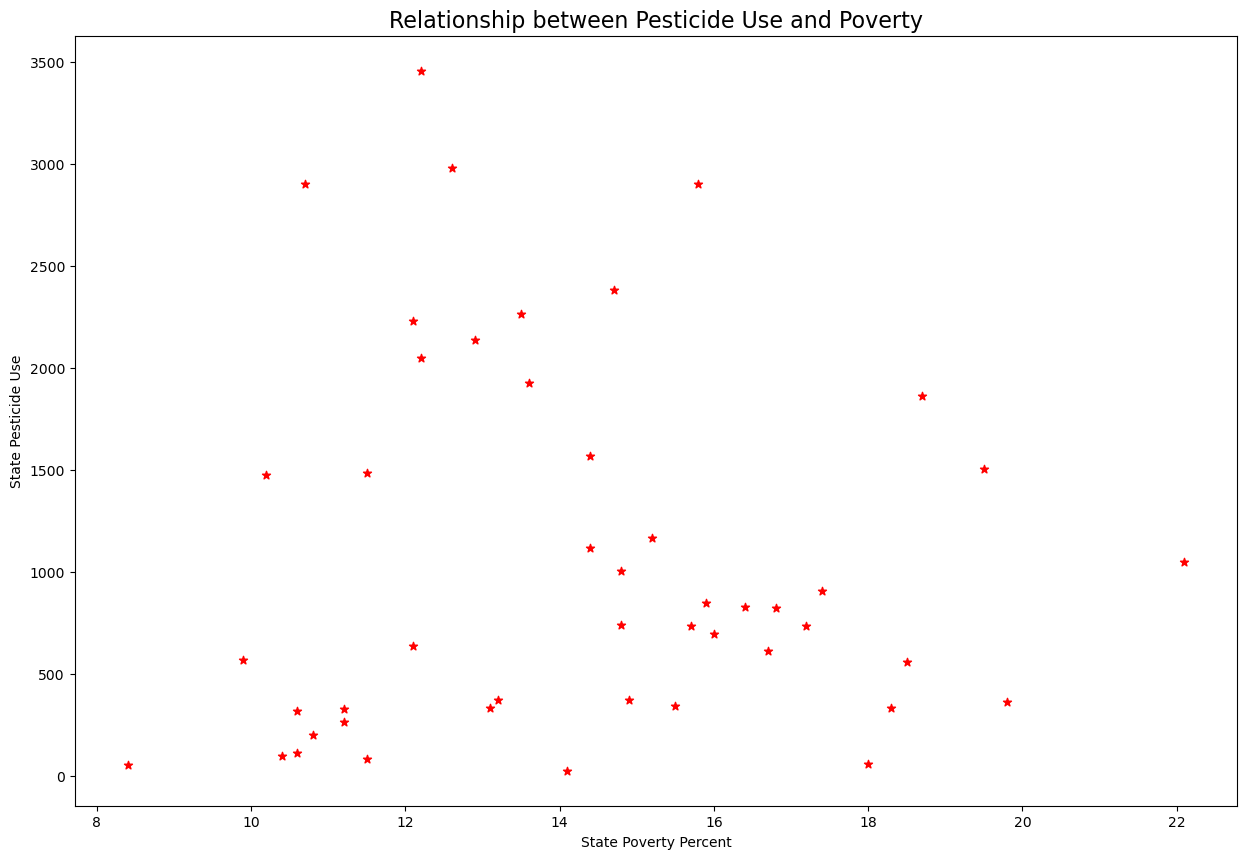

In [315]:
#Visual 3

plt.figure(figsize=(15,10))
plt.scatter(data2015['POVERTY_PERCENT_ALL_AGES'], data2015['STATE_PESTICIDE_USE_MEAN'], c="red", marker='*')
plt.title("Relationship between Pesticide Use and Poverty", fontsize=16)
plt.xlabel("State Poverty Percent")
plt.ylabel("State Pesticide Use")
plt.show


Answer to research question: There is not a strong correlation between pesticide use and poverty.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete this project, I would see if I could find data the had cancer related deaths at the city or county level. This would give me more region specific result for cancer related deaths. Also, I would look at the data for other years to see how the results compared.